In [39]:
#import important libraries
import pandas as pd
import numpy as np
import sys
import os
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import model_selection
from sklearn import preprocessing
from scipy.stats import chi2_contingency

from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn_extra.cluster import KMedoids
from factor_analyzer import FactorAnalyzer

from prince import FAMD

import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#import  traain dataset
df = pd.read_csv("train.csv", encoding='ISO-8859-1')

df.head()
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [41]:
#finding count of missing values in each column
df.isna().sum()

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

In [42]:
unique_gender_categories = df['Gender of the patient'].unique()
print("Unique categories in the 'Gender' column:", unique_gender_categories)


Unique categories in the 'Gender' column: ['Female' 'Male' nan]


In [43]:
df.columns = ['Age', 'Gender', 'Total_Bilirubin',
       'Direct_Bilirubin', 'Alkphos_Alkaline_Phosphotase',
       'Sgpt_Alamine_Aminotransferase', 'Sgot_Aspartate_Aminotransferase',
       'Total_Protiens', 'ALB_Albumin',
       'A/G_Ratio_Albumin_and_Globulin_Ratio', 'Liver_disease']
## RENAMED RESULT AS Liver_disease
# Renaming Done
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkphos_Alkaline_Phosphotase,Sgpt_Alamine_Aminotransferase,Sgot_Aspartate_Aminotransferase,Total_Protiens,ALB_Albumin,A/G_Ratio_Albumin_and_Globulin_Ratio,Liver_disease
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [44]:
unique_gender_categories = df['Gender'].unique()
print("Unique categories in the 'Gender' column:", unique_gender_categories)


Unique categories in the 'Gender' column: ['Female' 'Male' nan]


In [45]:
#unique values in Liver_disease variable
values_in_Liver_disease = df["Liver_disease"].unique()
print(values_in_Liver_disease)

#recoding Liver_disease variable - 2 means dont have disease - converted that to 0; 1 remains the same
df['Liver_disease'] = df['Liver_disease'].replace(2, 0)
print(df["Liver_disease"].unique())

[1 2]
[1 0]


In [28]:
#encoding Gender column into categorical data 
LabelEncoder = LabelEncoder()
df['is_male'] = LabelEncoder.fit_transform(df['Gender'])
df = df.drop(columns='Gender')
df =  df.rename(columns={'is_male':'Gender'}, inplace=False)

#new gender column where male=1 and female=0

In [46]:
# Assuming 'Male' and 'Female' are the original values in the 'Gender' column
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
## Male=1 Female=0

In [48]:
unique_gender_categories = df['Gender'].unique()
print("Unique categories in the 'Gender' column:", unique_gender_categories)


Unique categories in the 'Gender' column: [ 0.  1. nan]


In [49]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkphos_Alkaline_Phosphotase,Sgpt_Alamine_Aminotransferase,Sgot_Aspartate_Aminotransferase,Total_Protiens,ALB_Albumin,A/G_Ratio_Albumin_and_Globulin_Ratio,Liver_disease
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [50]:
#dropping null values - does not affect data
df = df.dropna()
#finding count of missing values in each column
df.isna().sum()

Age                                     0
Gender                                  0
Total_Bilirubin                         0
Direct_Bilirubin                        0
Alkphos_Alkaline_Phosphotase            0
Sgpt_Alamine_Aminotransferase           0
Sgot_Aspartate_Aminotransferase         0
Total_Protiens                          0
ALB_Albumin                             0
A/G_Ratio_Albumin_and_Globulin_Ratio    0
Liver_disease                           0
dtype: int64

In [51]:
#identifying if there are duplicates
duplicates = df.duplicated().all()
print(duplicates)

False


In [52]:
print ('Total persons without liver disease :  {} and its percentage is {} %'.format(df.Liver_disease.value_counts()[0], round(df.Liver_disease.value_counts()[0]/df.Liver_disease.value_counts().sum()*100,2)) )
print ('Total persons with liver disease :  {} and its percentage is {} %'.format(df.Liver_disease.value_counts()[1], round(df.Liver_disease.value_counts()[1]/df.Liver_disease.value_counts().sum()*100,2)) )

Total persons without liver disease :  7680 and its percentage is 28.28 %
Total persons with liver disease :  19478 and its percentage is 71.72 %


TEST TRAIN SPLIT

In [53]:
X = df.drop(columns=['Liver_disease'])
y = df['Liver_disease']

#20% allocated for test data and 80% for train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [54]:
#train data
train = pd.concat([X_train, y_train], axis=1)
#test data
test = pd.concat([X_test, y_test], axis=1)

****** BEST MODEL 1 *****

RANDOM FOREST : ORIGINAL SAMPLE : ACCURACY 0.9998

In [13]:
np.random.seed(28)

rf = RandomForestClassifier(random_state=28)
param_grid = {
    'n_estimators': [50, 60, 70, 80, 90, 100, 150],
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)


# Print the best hyperparameters
print(grid_search.best_params_)

# Print the best score
print(grid_search.best_score_)


{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}
0.9998192805088031


In [15]:
rf = RandomForestClassifier(n_estimators=70, max_depth=None, max_features='auto', min_samples_leaf=1, min_samples_split=2, random_state=28)
rf_fit=rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%") 

misclassification_rate = round(np.mean(y_test != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  99.98 %
Misclassification rate of this model:  0.02 %

Report card of this model: 
              precision    recall  f1-score   support

           0      1.000     0.999     1.000      1556
           1      1.000     1.000     1.000      3978

    accuracy                          1.000      5534
   macro avg      1.000     1.000     1.000      5534
weighted avg      1.000     1.000     1.000      5534

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 1555 |                    1 |
+-----------------+----------------------+----------------------+
| Actual Positive |                    0 |                 3978 |
+-----------------+----------------------+----------------------+


In [18]:
### Feature importance

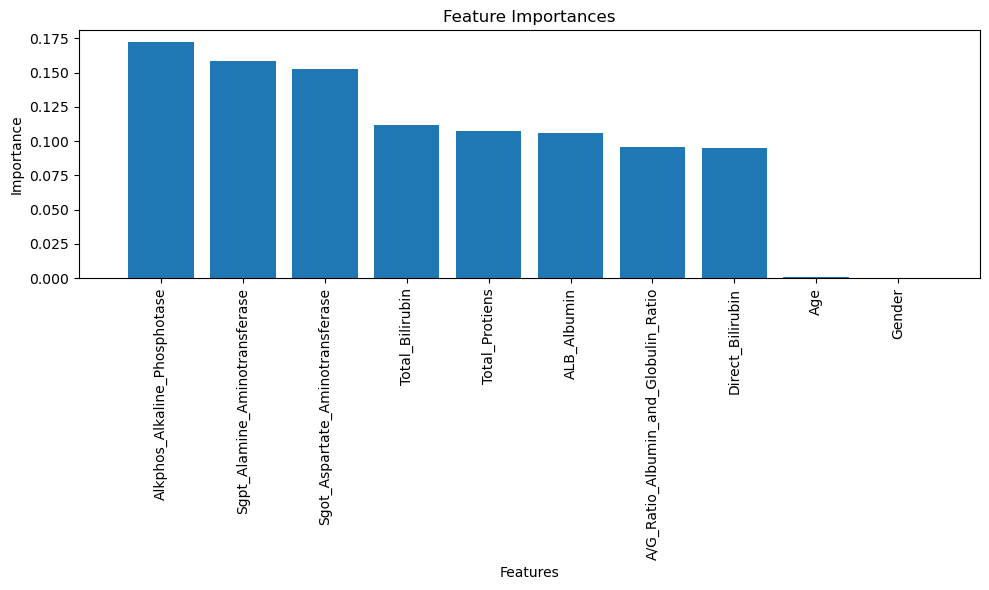

In [16]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_fit.feature_importances_

# Get feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame with column names

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


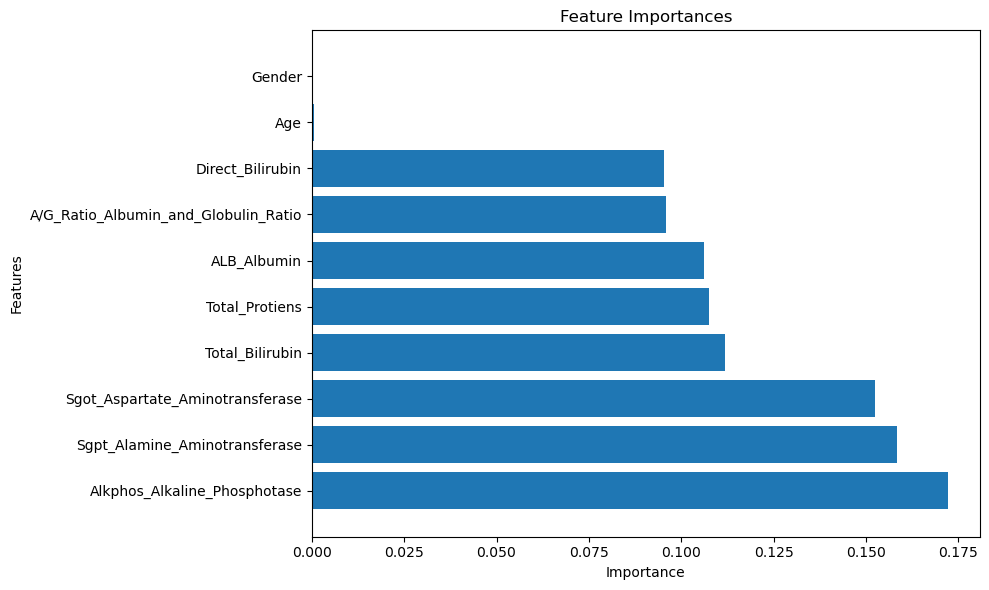

In [17]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_fit.feature_importances_

# Get feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame with column names

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), sorted_feature_names)  # Use feature names for y-axis ticks
plt.ylim([-1, X_train.shape[1]])  # Invert y-axis limits to start from top
plt.xlabel("Importance")  # Swap x and y axis labels
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [ ]:
### Tests for checking actually they are aunnecessary variables

In [57]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming you have a DataFrame named df containing the variables "gender" and "Liver_disease"
# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Liver_disease'])

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)


Contingency Table:
Liver_disease     0      1
Gender                    
0.0            2020   5104
1.0            5660  14374

Chi-Square Statistic: 0.022589507271120246
p-value: 0.880529462368887
Degrees of Freedom: 1
Expected Frequencies:
[[ 2014.59312173  5109.40687827]
 [ 5665.40687827 14368.59312173]]


In [ ]:
## With a p-value of 0.881, we fail to reject the null hypothesis of independence at the typical
#significance level ( α = 0.05). Therefore, there is no significant association
#between gender and liver disease 

In [56]:
from scipy.stats import ttest_ind, mannwhitneyu

# Split the data based on the values of "Liver_disease"
age_with_disease = df[df['Liver_disease'] == 1]['Age']
age_without_disease = df[df['Liver_disease'] == 0]['Age']

# Perform independent samples t-test (assuming normality)
t_statistic, p_value_ttest = ttest_ind(age_with_disease, age_without_disease)
print("Independent Samples t-test:")
print("t-statistic:", t_statistic)
print("p-value:", p_value_ttest)

# Perform Mann-Whitney U test (if normality assumption is violated)
u_statistic, p_value_mannwhitneyu = mannwhitneyu(age_with_disease, age_without_disease)
print("\nMann-Whitney U Test:")
print("U-statistic:", u_statistic)
print("p-value:", p_value_mannwhitneyu)


Independent Samples t-test:
t-statistic: 1.1645063253384433
p-value: 0.24422911141519432

Mann-Whitney U Test:
U-statistic: 75513653.5
p-value: 0.21695674811389298


The results of both the independent samples t-test and the Mann-Whitney U test suggest that there is no significant difference in the mean age between individuals with liver disease and individuals without liver disease.

Since the p-value (0.2442) is greater than the typical significance level ( α = 0.05), we fail to reject the null hypothesis. This indicates that there is no significant difference in the mean age between the two groups.

Similarly, since the p-value (0.2170) is greater than the typical significance level, we fail to reject the null hypothesis. This indicates that there is no significant difference in the median age between the two groups.

Selecting only best 8 variables and fitting the model

In [58]:
# Get the top 8 important features
top_features = sorted_feature_names[:8]

# Select only the top 8 features from X_train
X_train_selected = X_train[top_features]

# Initialize and fit the RandomForestClassifier with the selected features
rf_selected = RandomForestClassifier(n_estimators=70, max_depth=None, max_features='auto', min_samples_leaf=1, min_samples_split=2, random_state=28)
rf_selected.fit(X_train_selected, y_train)


RandomForestClassifier(max_features='auto', n_estimators=70, random_state=28)

In [59]:
# Select only the top 8 features from X_test
X_test_selected = X_test[top_features]

# Make predictions using the model trained with the selected features
y_pred = rf_selected.predict(X_test_selected)

# Compute accuracy score
accuracy = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
print("Accuracy score of this model: ", accuracy, "%")

# Compute misclassification rate
misclassification_rate = round(np.mean(y_test != y_pred) * 100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

# Print classification report
print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)


Accuracy score of this model:  100.0 %
Misclassification rate of this model:  0.0 %

Report card of this model: 
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      1573
           1      1.000     1.000     1.000      3859

    accuracy                          1.000      5432
   macro avg      1.000     1.000     1.000      5432
weighted avg      1.000     1.000     1.000      5432

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 1573 |                    0 |
+-----------------+----------------------+----------------------+
| Actual Positive |                    0 |                 3859 |
+-----------------+----------------------+----------------------+


In [ ]:
### TO check whether the model with only important features it is over fitted or not

In [60]:
from tabulate import tabulate

# Select only the top 8 features from X_train and X_test
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Fit the RandomForestClassifier to the training data with selected features
rf = RandomForestClassifier(n_estimators=70, max_depth=None, max_features='auto', min_samples_leaf=1, min_samples_split=2, random_state=28)
rf.fit(X_train_selected, y_train)

# Predict on the test data with selected features
y_pred_test = rf.predict(X_test_selected)

# Compute accuracy score
accuracy = round(metrics.accuracy_score(y_test, y_pred_test) * 100, 2)
print("Accuracy score of this model: ", accuracy, "%")

# Compute misclassification rate
misclassification_rate = round(np.mean(y_test != y_pred_test) * 100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

# Print classification report
print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_test, digits=3))

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix for y_pred_test:")
print(confusion_table)


Accuracy score of this model:  100.0 %
Misclassification rate of this model:  0.0 %

Report card of this model: 
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      1573
           1      1.000     1.000     1.000      3859

    accuracy                          1.000      5432
   macro avg      1.000     1.000     1.000      5432
weighted avg      1.000     1.000     1.000      5432

Confusion Matrix for y_pred_test:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 1573 |                    0 |
+-----------------+----------------------+----------------------+
| Actual Positive |                    0 |                 3859 |
+-----------------+----------------------+----------------------+


In [61]:
# Select only the top 8 features from X_train
X_train_selected = X_train[top_features]

# Fit the RandomForestClassifier to the training data with the selected features
rf = RandomForestClassifier(n_estimators=70, max_depth=None, max_features='auto', min_samples_leaf=1, min_samples_split=2, random_state=28)
rf.fit(X_train_selected, y_train)

# Predict on the training data
y_pred_train = rf.predict(X_train_selected)

# Compute accuracy score
accuracy = round(metrics.accuracy_score(y_train, y_pred_train) * 100, 2)
print("Accuracy score of this model: ", accuracy, "%")

# Compute misclassification rate
misclassification_rate = round(np.mean(y_train != y_pred_train) * 100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

# Print classification report
print("\nReport card of this model: ")
print(metrics.classification_report(y_train, y_pred_train, digits=3))

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_train, y_pred_train)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix for y_pred_train:")
print(confusion_table)


Accuracy score of this model:  99.99 %
Misclassification rate of this model:  0.01 %

Report card of this model: 
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      6107
           1      1.000     1.000     1.000     15619

    accuracy                          1.000     21726
   macro avg      1.000     1.000     1.000     21726
weighted avg      1.000     1.000     1.000     21726

Confusion Matrix for y_pred_train:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 6104 |                    3 |
+-----------------+----------------------+----------------------+
| Actual Positive |                    0 |                15619 |
+-----------------+----------------------+----------------------+


In [ ]:
## For both train accuracy and test accuracy

In [19]:
rf = RandomForestClassifier(n_estimators=70, max_depth=None, max_features='auto', min_samples_leaf=1, min_samples_split=2, random_state=28)
rf.fit(X_train,y_train)
y_pred_test = rf.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred_test)*100, 2)
print("Accuracy score of this model: ", accuracy, "%") 

misclassification_rate = round(np.mean(y_test != y_pred_test)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_test, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix for y_pred_test:")
print(confusion_table)

Accuracy score of this model:  99.98 %
Misclassification rate of this model:  0.02 %

Report card of this model: 
              precision    recall  f1-score   support

           0      1.000     0.999     1.000      1556
           1      1.000     1.000     1.000      3978

    accuracy                          1.000      5534
   macro avg      1.000     1.000     1.000      5534
weighted avg      1.000     1.000     1.000      5534

Confusion Matrix for y_pred_test:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 1555 |                    1 |
+-----------------+----------------------+----------------------+
| Actual Positive |                    0 |                 3978 |
+-----------------+----------------------+----------------------+


In [20]:
rf = RandomForestClassifier(n_estimators=70, max_depth=None, max_features='auto', min_samples_leaf=1, min_samples_split=2, random_state=28)
rf.fit(X_train,y_train)
y_pred_train = rf.predict(X_train)

accuracy = round(metrics.accuracy_score(y_train, y_pred_train)*100, 2)
print("Accuracy score of this model: ", accuracy, "%") 

misclassification_rate = round(np.mean(y_train != y_pred_train)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_train, y_pred_train, digits=3))

conf_matrix = metrics.confusion_matrix(y_train, y_pred_train)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix y_pred_train:")
print(confusion_table)

Accuracy score of this model:  99.99 %
Misclassification rate of this model:  0.01 %

Report card of this model: 
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      6277
           1      1.000     1.000     1.000     15855

    accuracy                          1.000     22132
   macro avg      1.000     1.000     1.000     22132
weighted avg      1.000     1.000     1.000     22132

Confusion Matrix y_pred_train:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 6275 |                    2 |
+-----------------+----------------------+----------------------+
| Actual Positive |                    0 |                15855 |
+-----------------+----------------------+----------------------+


In [20]:
import pickle

In [36]:
import pickle

# Save the model
filename = r'C:\Users\HIRUNI\Desktop\3_2\ST 3082 - Statistical Learning I\Final Project\VSCODE_APP\model.pkl'
pickle.dump(rf, open(filename, 'wb'))


In [39]:
filename =r'C:\Users\HIRUNI\Desktop\3_2\ST 3082 - Statistical Learning I\Final Project\VSCODE_APP\model.pkl'
with open(filename, 'wb') as f:
    pickle.dump(rf, f)

print("Model saved successfully.")

Model saved successfully.
